# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/bahbbc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
exchange = pd.read_csv('kaggle-survey-2017/conversionRates.csv', encoding="ISO-8859-1", low_memory=False)

In [4]:
df = pd.merge(left=df, right=exchange, how='left', 
              left_on='CompensationCurrency', right_on='originCountry')

In [6]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'Unnamed: 0', 'originCountry',
       'exchangeRate'],
      dtype='object', length=231)

In [7]:
df.shape

(16716, 231)

## Histogramas

Transformar Age para inteiro para poder enxergar os numeros melhor

In [8]:
df['Age'] = df['Age'].fillna(0).astype(int)

Vamos ver um histograma da idade dos participantes

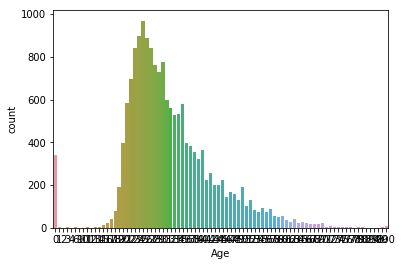

In [9]:
_ = sns.countplot(x = 'Age', data=df)

Ficou horrível...

Vamos adicionar o titulo e aumentar o gráfico

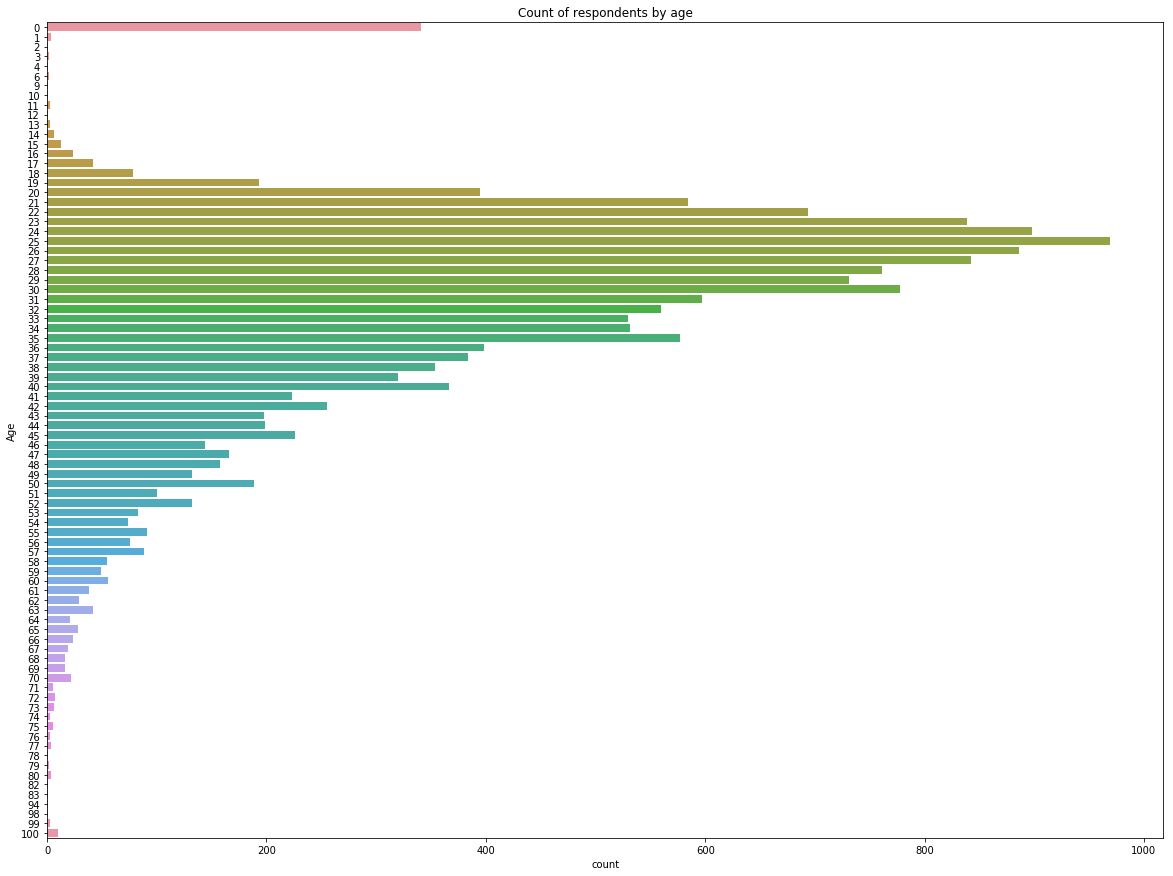

In [10]:
plt.subplots(figsize=(20,15))
plot = sns.countplot(y="Age", data=df).set_title("Count of respondents by age")

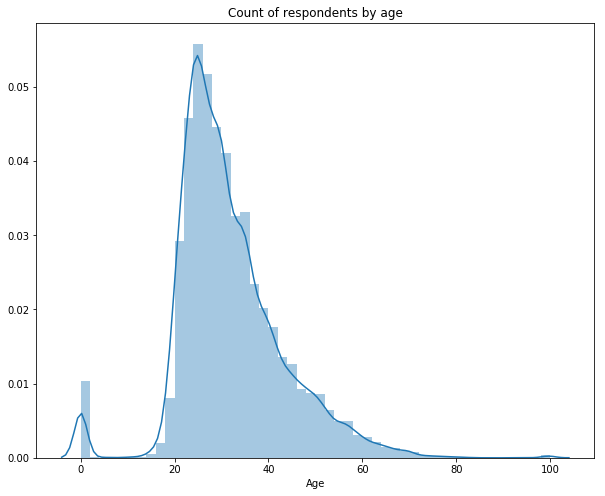

In [11]:
plt.subplots(figsize=(10,8))
_ = sns.distplot(df['Age']).set_title("Count of respondents by age")

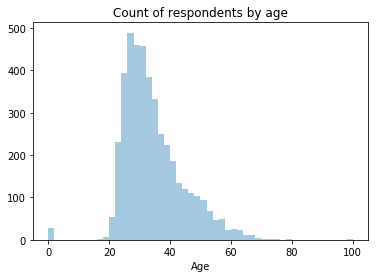

In [52]:
_ = sns.distplot(df['Age'], kde=False).set_title("Count of respondents by age")

Distplot não aceita Nulos

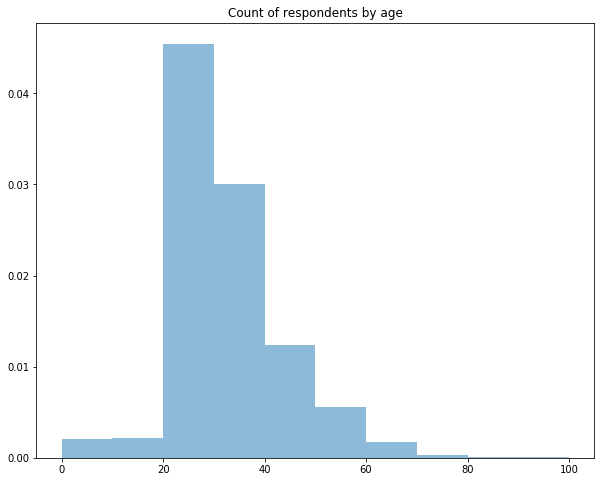

In [12]:
plt.subplots(figsize=(10,8))
_ = plt.hist(df['Age'], normed=True, alpha=0.5)
_ = plt.title("Count of respondents by age")

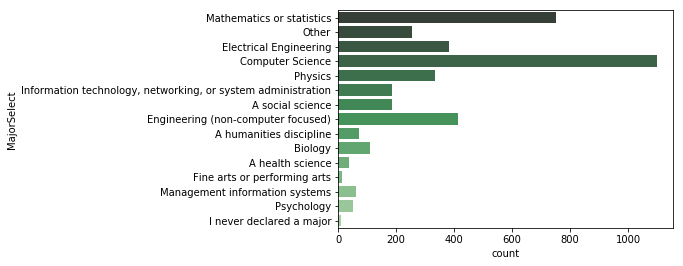

In [57]:
sns.countplot(y="MajorSelect", data=df, palette="Greens_d")

E se trocarmos os y por um x?

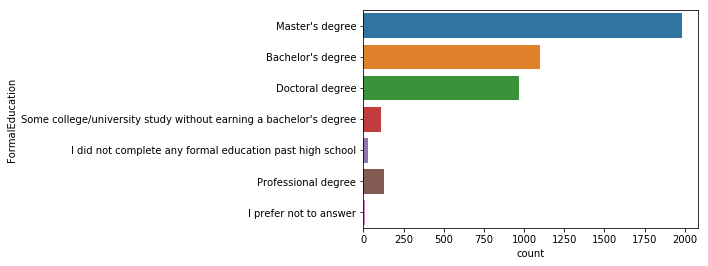

In [68]:
sns.countplot(y="FormalEducation", data=df)

In [70]:
df['PastJobTitlesSelect'].value_counts()

Other                                                                                                                                                                                             281
Researcher                                                                                                                                                                                        262
Software Developer/Software Engineer                                                                                                                                                              167
Data Analyst                                                                                                                                                                                      126
Engineer                                                                                                                                                                                          116
Programmer

Atividade: Construir uma função que agrupe os tipos de empregos e plot em um barplot.

In [73]:
df['FirstTrainingSelect'].value_counts()

Online courses (coursera, udemy, edx, etc.)    1394
University courses                             1267
Self-taught                                    1117
Work                                            406
Kaggle competitions                              73
Other                                            73
Name: FirstTrainingSelect, dtype: int64

In [74]:
df['MLSkillsSelect'].value_counts()

Supervised Machine Learning (Tabular Data)                                                                                                                                                                                                                                           446
Supervised Machine Learning (Tabular Data),Time Series                                                                                                                                                                                                                               194
Supervised Machine Learning (Tabular Data),Unsupervised Learning                                                                                                                                                                                                                     176
Time Series                                                                                                                                                  

In [75]:
df['MLTechniquesSelect'].value_counts()

Logistic Regression                                                                                                                                                                                                                                                207
Decision Trees - Random Forests,Logistic Regression                                                                                                                                                                                                                156
Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Logistic Regression                                                                                                                                                                      90
Decision Trees - Gradient Boosted Machines,Decision Trees - Random Forests,Ensemble Methods,Gradient Boosting,Logistic Regression,Support Vector Machines (SVMs)                                                   

In [76]:
df['TimeGatheringData'].value_counts()

50.0     627
30.0     608
40.0     595
20.0     572
60.0     358
10.0     356
70.0     201
0.0      155
25.0     146
80.0     113
35.0     107
15.0      93
5.0       83
45.0      65
65.0      53
55.0      46
90.0      37
75.0      37
100.0     11
85.0       8
1.0        6
12.0       3
28.0       3
93.0       2
2.0        2
6.0        2
7.0        2
48.0       2
99.0       2
8.0        2
19.0       2
66.0       2
49.0       2
33.0       2
86.0       2
34.0       2
83.0       1
17.0       1
31.0       1
47.0       1
13.0       1
53.0       1
29.0       1
64.0       1
44.0       1
36.0       1
37.0       1
3.0        1
16.0       1
24.0       1
11.0       1
23.0       1
42.0       1
87.0       1
59.0       1
78.0       1
39.0       1
92.0       1
73.0       1
77.0       1
Name: TimeGatheringData, dtype: int64

In [77]:
df['AlgorithmUnderstandingLevel'].value_counts()

Enough to explain the algorithm to someone non-technical                                1704
Enough to code it again from scratch, albeit it may run slowly                          1063
Enough to run the code / standard library                                                509
Enough to refine and innovate on the algorithm                                           485
Enough to tune the parameters properly                                                   382
Enough to code it from scratch and it will run blazingly fast and be super efficient     173
Name: AlgorithmUnderstandingLevel, dtype: int64

In [78]:
df['WorkChallengesSelect'].value_counts()

I prefer not to say                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            135
Dirty data                                           

In [79]:
df['RemoteWork'].value_counts()

Sometimes           1607
Rarely              1185
Never                539
Most of the time     413
Always               227
Don't know            14
Name: RemoteWork, dtype: int64

In [81]:
df['LearningDataScienceTime'].value_counts()

Series([], Name: LearningDataScienceTime, dtype: int64)

## Boxplot

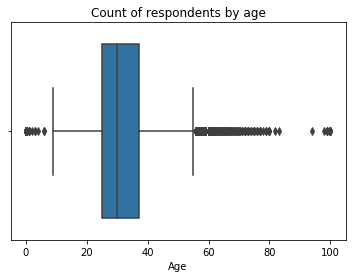

In [13]:
_ = sns.boxplot(df['Age']).set_title("Count of respondents by age")

In [14]:
money_index = df['CompensationAmount'].notnull()

In [15]:
compensation_check = df[money_index]

In [16]:
df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,Unnamed: 0,exchangeRate
count,16716.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000,7530.000000,7528.000000,7517.000000,7529.000000,7523.000000,7513.000000,4529.000000,4529.000000
mean,31.731814,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940,36.144754,21.268066,10.806372,13.869372,13.094776,2.396247,7.075293,0.703953
std,11.307691,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886,21.649591,16.165958,12.257932,11.722945,12.974846,12.157137,11.333361,0.486712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000030
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,5.000000,5.000000,0.000000,1.000000,0.058444
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000,35.000000,20.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000,7.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,86.000000,2.652053


In [17]:
compensation_check['GenderSelect'].value_counts()

Male                                                 4432
Female                                                725
A different identity                                   32
Non-binary, genderqueer, or gender non-conforming      29
Name: GenderSelect, dtype: int64

In [18]:
df['exchangeRate'] = df['exchangeRate'].fillna(0)
df['CompensationAmount'] = df['CompensationAmount'].fillna(0)

In [19]:
df['CompensationAmount'] = df.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',',''))) 
df['CompensationAmount'] = df['CompensationAmount']*df['exchangeRate']
df = df[df['CompensationAmount']>0]

In [20]:
df['CompensationAmount'].describe()

count    4.333000e+03
mean     6.651893e+06
std      4.298948e+08
min      6.000000e-02
25%      2.152487e+04
50%      5.390140e+04
75%      9.627720e+04
max      2.829740e+10
Name: CompensationAmount, dtype: float64

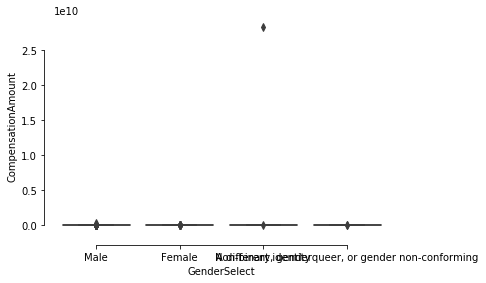

In [25]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df)
sns.despine(offset=10, trim=True)

Tem um outlier nesse conj. de dados que está atrapalhando a nossa visualização... Podemos removê-lo usando boolean indexes. Vamos usar pessoas que ganham até 2000000.

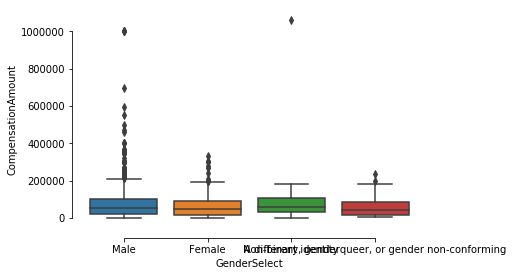

In [38]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df[df['CompensationAmount'] < 2000000])
sns.despine(offset=10, trim=True)

Agora vamos colocar os titulos em 45º

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

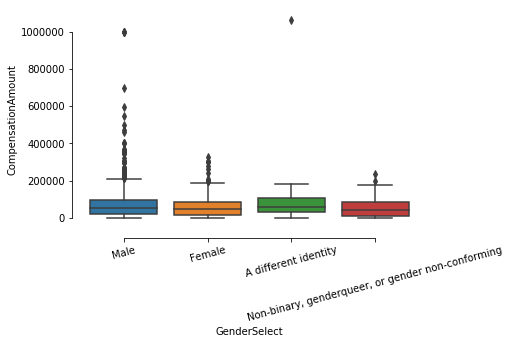

In [45]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df[df['CompensationAmount'] < 2000000])
sns.despine(offset=10, trim=True)
plt.xticks(rotation=15)

## Scatterplots (Dispersão)

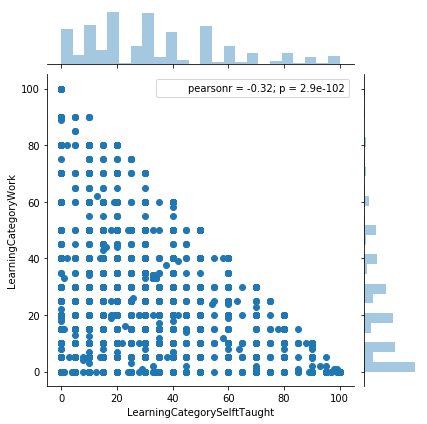

In [55]:
sns.jointplot(x="LearningCategorySelftTaught", y="LearningCategoryWork", data=df);

/home/bahbbc/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/bahbbc/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


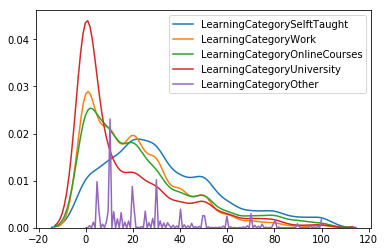

In [71]:
sns.kdeplot(df['LearningCategorySelftTaught'])
sns.kdeplot(df['LearningCategoryWork'])
sns.kdeplot(df['LearningCategoryOnlineCourses'])
sns.kdeplot(df['LearningCategoryUniversity'])
#sns.kdeplot(df['LearningCategoryKaggle'])
sns.kdeplot(df['LearningCategoryOther'])
plt.legend();

Desafio:

Fazer um Heatmap. Siga os passos [desse tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html). Atenção! Use apenas as variáveis numéricas

## Gráficos do Kaggle

http://blog.kaggle.com/2017/10/30/introducing-kaggles-state-of-data-science-machine-learning-report-2017/

Joyplots -> http://blog.kaggle.com/2017/07/20/joyplots-tutorial-with-insect-data/

Plots de mapas -> http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/